In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!pwd

/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Numerical_Solutions


# Simple Harmonic Oscillator (Initial Value Problem)

In this Jupyyter notebook, SHO is studied as an initial value problem using the following methods:
- Euler 
- Modified Euler
- RK2
- RK4
- Leapfrog

### Some details

The differential equation for SHO is given as: 
\begin{equation}
\ddot{x} = - \omega^{2} x
\end{equation}

The above can be written as 2 linear first order ODE as 
\begin{equation}
\dot{x} = v \& \dot{v} = - \omega^{2} x
\end{equation}

We need to study the time evolution of this SHO i.e., we integrate the equations of motion and find 'x' and see how the energy of the SHO evolves.

Analytically, we know that the total energy of the SHO is given as:
\begin{equation}
E = \frac{mv^{2}}{2} + \frac {m \omega^{2}x^{2}}{2}
\end{equation}

In [2]:
#Initial conditions and constants
x_ini = 1
v_ini = 0

omega = 1
dt = 0.1
nsteps = 1000
m = 1

### Define functions for time evolution and energy calculation of SHO using different methods

In [3]:
#Euler method
def sho_euler(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v[i] * dt_val
        v_new = v[i] - omega_val**2 * x[i] * dt_val
        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new)
        t.append(t_new)

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})


In [ ]:
#Modified Euler
def sho_modified_euler(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_temp = x[i] + v[i] * dt_val
        v_temp = v[i] - omega_val**2 * x[i] * dt_val

        x_new = x[i] + 0.5 * (v[i] + v_temp) * dt_val
        v_new = v[i] - 0.5 * omega_val**2 * (x[i] + x_temp) * dt_val
        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new)
        t.append(t_new)

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})

In [2]:
#RK2

In [3]:
#RK4

In [13]:
#Leapfrog method
def sho_leapfrog(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v_half = v_ini_val - 0.5 * omega_val**2 * x_ini_val * dt_val    #v_n+1/2 Initialize
    v.append(v_half)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v_half * dt_val     #Position update
        v_new_half = v_half - omega_val**2 * x_new * dt_val    #v_n Velocity update
        t_new = t[i] + dt_val
        v_full = v_new_half + 0.5 * omega_val**2 * x_new * dt_val   #Full step velocity

        x.append(x_new)
        v.append(v_full)  #Storing full step velocity
        #v.append(v_new_half)   #Storing half-step velocity
        t.append(t_new)

        v_half = v_new_half

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})

In [14]:
def sho_energy(x_val, v_val, m_val, omega_val):
    E = 0.5 * m_val * v_val**2 + 0.5 * m_val * omega_val**2 * x_val**2
    return E

In [15]:
#Euler
df_e = sho_euler(x_ini, v_ini, omega, dt, nsteps)

# Leapfrog
df_l = sho_leapfrog(x_ini, v_ini, omega, dt, nsteps)


In [20]:
df_e

,Time,Position,Velocity
0,0.0,1.000000,0.000000
1,0.1,1.000000,-0.100000
2,0.2,0.990000,-0.200000
3,0.3,0.970000,-0.299000
4,0.4,0.940100,-0.396000
...,...,...,...
995,99.5,29.457267,138.109329
996,99.6,43.268200,135.163603
997,99.7,56.784560,130.836783
998,99.8,69.868238,125.158327


In [21]:
df_l

,Time,Position,Velocity
0,0.0,1.000000,-0.050000
1,0.1,0.995000,-0.099750
2,0.2,0.980050,-0.198503
3,0.3,0.955299,-0.295270
4,0.4,0.920996,-0.389085
...,...,...,...
995,99.5,0.549141,0.834684
996,99.6,0.629864,0.775734
997,99.7,0.704288,0.709026
998,99.8,0.771669,0.635228


### Energy vs Time

In [16]:
#Energy
E_e = sho_energy(df_e['Position'], df_e['Velocity'], m, omega)
E_l = sho_energy(df_l['Position'], df_l['Velocity'], m, omega)

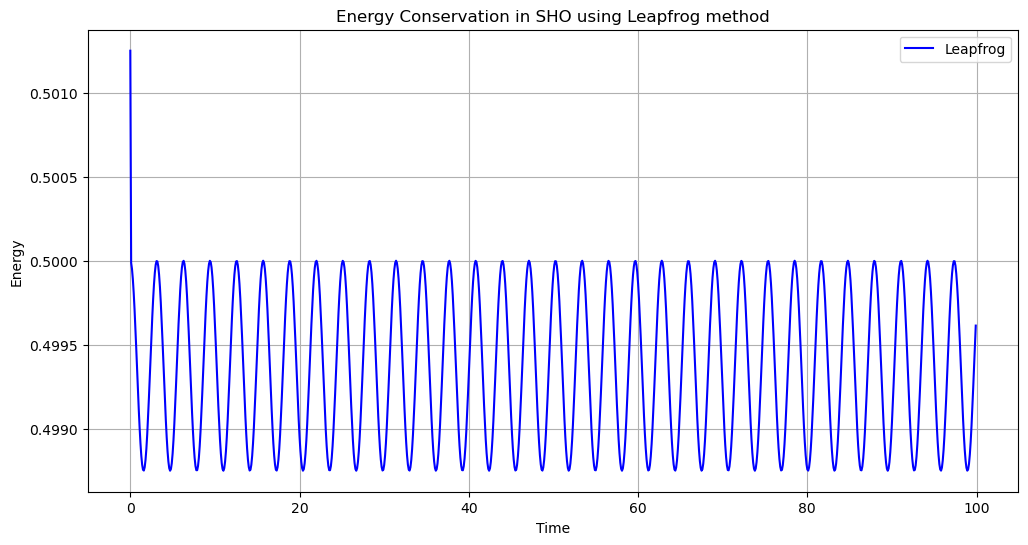

In [23]:
plt.figure(figsize=(12, 6))
#plt.plot(df_e['Time'], E_e, label='Euler', color='red')
plt.plot(df_l['Time'], E_l, label='Leapfrog', color='blue')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation in SHO using Leapfrog method')
plt.legend()
plt.grid()
plt.show()

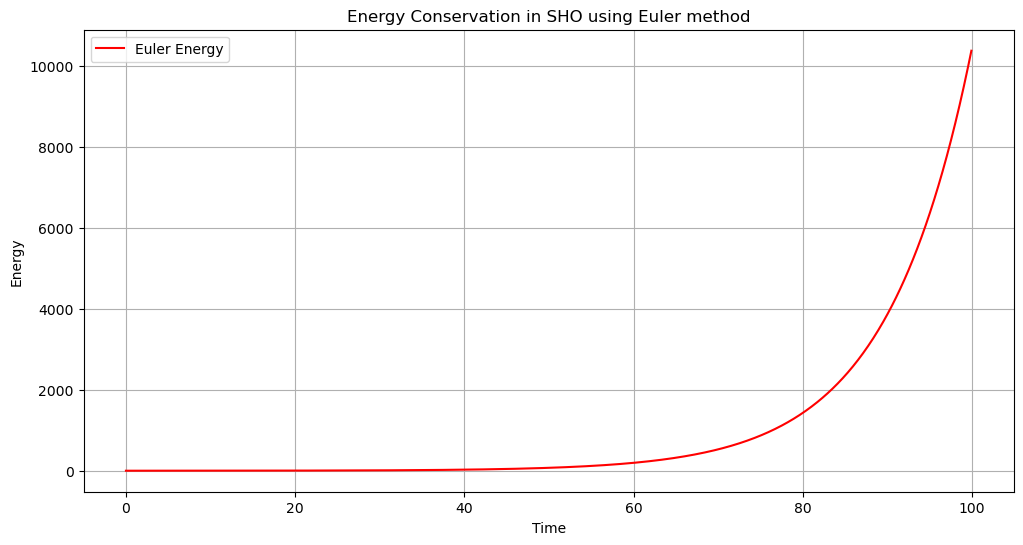

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_e['Time'], E_e, label='Euler', color='red')
#plt.plot(df_l['Time'], E_l, label='Leapfrog', color='blue')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation in SHO using Euler method')
plt.legend()
plt.grid()
plt.show()

### Position vs Time

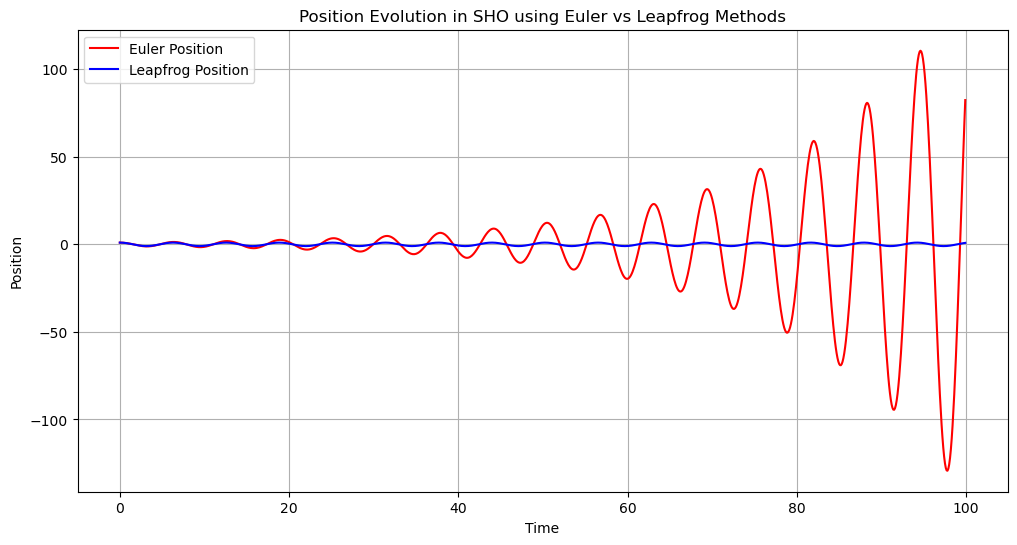

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_e['Time'], df_e['Position'], label='Euler', color='red')
plt.plot(df_l['Time'], df_l['Position'], label='Leapfrog', color='blue')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position Evolution in SHO using Euler vs Leapfrog Methods')
plt.legend()
plt.grid()
plt.show()

### Phase Space

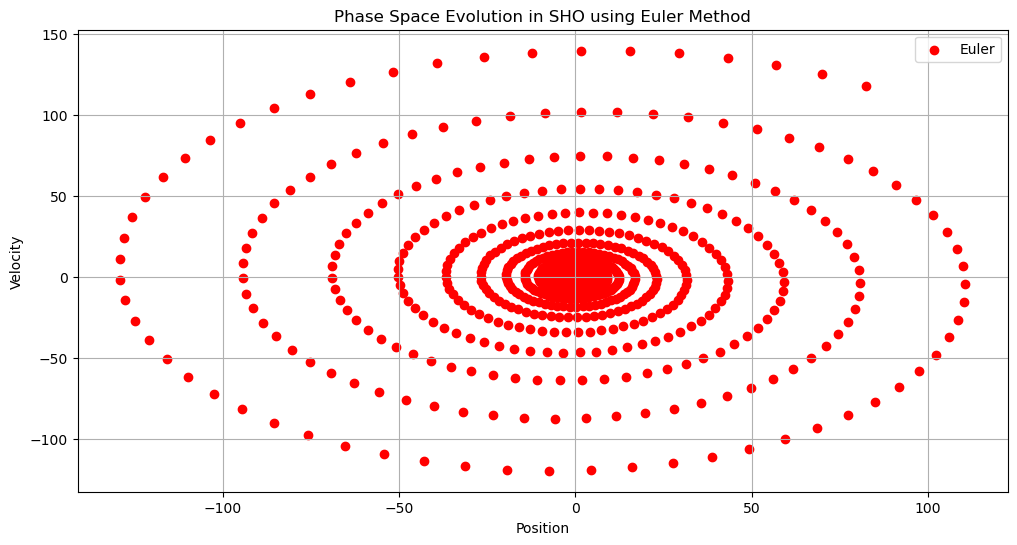

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter( df_e['Position'], df_e['Velocity'], label='Euler', color='red')
#plt.scatter(df_l['Position'], df_l['Velocity'], label='Leapfrog', color='blue')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Evolution in SHO using Euler Method')
plt.legend()
plt.grid()
plt.show()

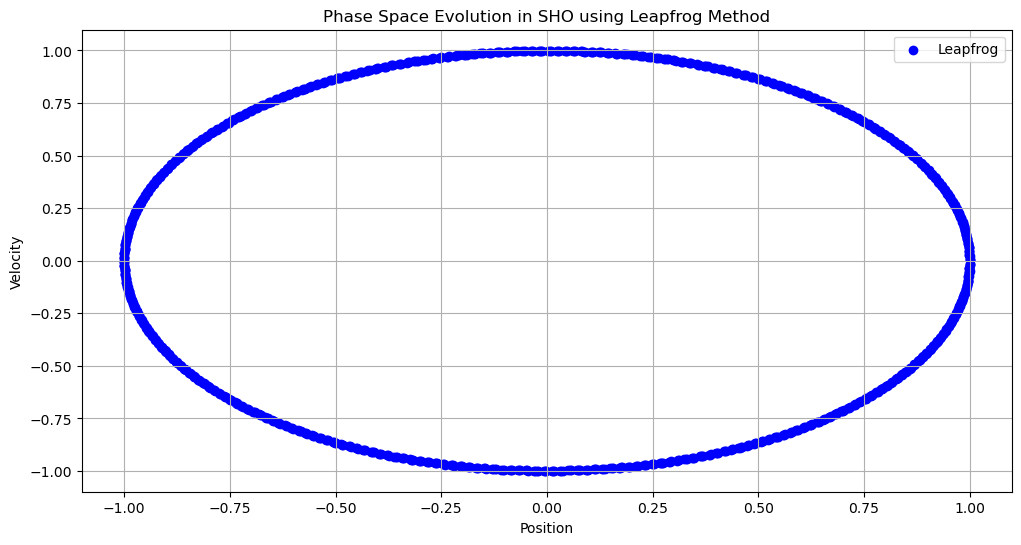

In [25]:
plt.figure(figsize=(12, 6))
#plt.scatter( df_e['Position'], df_e['Velocity'], label='Euler', color='red')
plt.scatter(df_l['Position'], df_l['Velocity'], label='Leapfrog', color='blue')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Evolution in SHO using Leapfrog Method')
plt.legend()
plt.grid()
plt.show()